In [201]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recruitment-task/sample_submission.csv
/kaggle/input/recruitment-task/train.csv
/kaggle/input/recruitment-task/test.csv


# Train Data

In [202]:
df=pd.read_csv("/kaggle/input/recruitment-task/train.csv")

In [203]:
df.head()

,ID,Brand,VehicleModel,ManufacturingYear,Type,rating,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,#airbags,price
0,2624,NaN,I have the fastest model ever.. yes you got it...,2017,WOOW Sedan,0.0,NaN,I had to pay a substantial $1249 levy on my ne...,Gas,4.0,R,2.5,75492 KM,1008,21012
1,14392,I love TOYOTA,NaN,NaN,Minivan3,5.0,Metallic,-,Gas,4.0 cyl,R,2.4,220000 KM,-96,11917
2,9822,hyundai,H1,2009,MINIVAN,0.0,Metallic,1185$,Dies,4.0,R,2.5,TOTAL 50653 km,4 count,22433
3,17123,opel,Corsa,NaN,Hatchback,5.0,Jet Black,-,NaN,4.0,auto,0,230000 KM,0,5645
4,11133,subaru,I own Outback.,2007,Hatchback,4.0,Sapphire Blue,-,Gas,4.0,NaN,2.5,131000 KM,4,10976


In [204]:
df.rename(columns={'#airbags': 'airbags'}, inplace=True)

# Data description
- **ID**: A unique identifier for each car in the dataset.
- **Brand** : The manufacturer or brand of the car, such as Toyota, Ford, or Honda.
- **VehicleModel** : The specific name of the car model produced by the manufacturer, such as Elantra.
- **ManufacturingYear** : The year the car was manufactured.
- **Type** : The category or classification of the car, such as Sedan, Hatchback, etc.
- **Rating** : A numerical or categorical rating indicating the car's quality.
- **Color** : The exterior color of the car.
- **Duty** : The tax associated with the car.
- **Fuel** : The type of fuel the car uses, such as gasoline, diesel, or electric hybrid.
- **CylinderCount** : The number of cylinders in the car's engine.
- **Type of Gear** : The type of transmission the car has, such as manual or automatic.
- **Capacity** : The Engine Volume.
- **Odometer** : The total distance the car has traveled, measured in kilometers.
- **Airbags** : The number of airbags installed in the car for passenger safety.
- **Price** : The cost or market value of the car.

In [205]:
df.info()
#i see that the data type od many columns need to be dealt with

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 7000 non-null   int64  
 1   Brand              6294 non-null   object 
 2   VehicleModel       6303 non-null   object 
 3   ManufacturingYear  6305 non-null   object 
 4   Type               6315 non-null   object 
 5   rating             6310 non-null   float64
 6   color              4876 non-null   object 
 7   Duty               7000 non-null   object 
 8   fuel               6304 non-null   object 
 9   CylinderCount      7000 non-null   object 
 10  type of gear       6308 non-null   object 
 11  capacity           7000 non-null   object 
 12  Odometer           7000 non-null   object 
 13  airbags            7000 non-null   object 
 14  price              7000 non-null   int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 820.4+ KB


In [206]:
df.describe() 
# i don't know if there is rating in negative but lets take it in consideration in data cleaning phase

,ID,rating,price
count,7000.000000,6310.000000,7000.000000
mean,9022.128714,2.559588,14406.866429
std,5202.316292,1.905482,11747.617978
min,1.000000,-4.000000,3.000000
25%,4546.750000,1.000000,5018.000000
50%,9044.500000,2.000000,12544.000000
75%,13523.250000,4.000000,20071.000000
max,18013.000000,10.000000,49889.000000


In [207]:
df.describe(include='O')

,Brand,VehicleModel,ManufacturingYear,Type,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,airbags
count,6294,6303,6305,6315,4876,7000,6304,7000,6308,7000,7000,7000
unique,185,1480,555,81,16,1173,7,28,7,87,4964,321
top,toyota,Prius,2012,sedan,Jet Black,-,Gas,4.0,auto,2,0 km,12
freq,497,113,429,1160,1239,2108,3272,2638,2870,1261,79,830


In [208]:
df.duplicated().sum()
# no duplicated data (finally something is good no need to drop)

0

In [209]:
df.isna().sum()/len(df)*100
# okay there are alot of null values in data and each column has its constrain and we will see how

ID                    0.000000
Brand                10.085714
VehicleModel          9.957143
ManufacturingYear     9.928571
Type                  9.785714
rating                9.857143
color                30.342857
Duty                  0.000000
fuel                  9.942857
CylinderCount         0.000000
type of gear          9.885714
capacity              0.000000
Odometer              0.000000
airbags               0.000000
price                 0.000000
dtype: float64

## NOW we are ready to get our hands dirty with data 

# Data Cleaning

## Brand column

In [210]:
df['Brand'].nunique()

185

In [211]:
df['Brand'].unique()
# the data has A LOT of irrelevant values , lets CLEAN IT

array([nan, 'I love TOYOTA', 'hyundai', 'opel', 'subaru', 'VOLKSWAGEN',
       'FORD', 'Bmw', 'jaguar', 'I love HONDA', 'mercedes-benz',
       'I love FORD', 'honda', 'HYUNDAI', 'NISSAN', 'toyota',
       'volkswagen', 'lexus', 'ford', 'SSANGYONG', 'HONDA', 'Hyundai',
       'Toyota', 'BMW', 'MERCEDES-BENZ is the best',
       'I love MERCEDES-BENZ', 'SSANGYONG is the best', 'I love SUBARU',
       'ssangyong', 'TOYOTA is the best', 'nissan', 'kia', 'DAEWOO',
       'SUBARU is the best', 'TOYOTA', 'bmw', 'AUDI', 'CHEVROLET', 'jeep',
       'SUBARU', 'MERCEDES-BENZ', 'Mercedes-Benz', 'I love BMW', 'LEXUS',
       'I love HYUNDAI', 'NISSAN is the best', 'Opel', 'PORSCHE', 'MAZDA',
       'I love NISSAN', 'HYUNDAI is the best', 'chevrolet', 'mitsubishi',
       'I love KIA', 'Chevrolet', 'mazda', 'KIA', 'BMW is the best',
       'gmc', 'I love LEXUS', 'MITSUBISHI', 'I love MITSUBISHI', 'skoda',
       'Lexus', 'Volkswagen', 'SUZUKI', 'Ford', 'JEEP', 'OPEL', 'Honda',
       'I love VOLKSW

In [212]:
def clean_brand(brand):
    if pd.isna(brand):
        return np.nan
        
    # Convert to lowercase and strip whitespace
    brand = str(brand).lower().strip()
    
    # Remove common phrases
    for phrase in ['i love ', ' is the best', 'i love']:
        brand = brand.replace(phrase, '')
    
    # Brand name mapping
    brand_mapping = {
        'bmw': 'BMW',
        'mercedes-benz': 'Mercedes-Benz',
        'mercedes': 'Mercedes-Benz',
        'vw': 'Volkswagen',
        'volkswagen': 'Volkswagen',
        'toyota': 'Toyota',
        'honda': 'Honda',
        'hyundai': 'Hyundai',
        'nissan': 'Nissan',
        'lexus': 'Lexus',
        'ford': 'Ford',
        'ssangyong': 'SsangYong',
        'subaru': 'Subaru',
        'kia': 'Kia',
        'daewoo': 'Daewoo',
        'audi': 'Audi',
        'chevrolet': 'Chevrolet',
        'jeep': 'Jeep',
        'opel': 'Opel',
        'porsche': 'Porsche',
        'mazda': 'Mazda',
        'mitsubishi': 'Mitsubishi',
        'gmc': 'GMC',
        'skoda': 'Skoda',
        'suzuki': 'Suzuki',
        'fiat': 'Fiat',
        'peugeot': 'Peugeot',
        'mini': 'Mini',
        'vaz': 'VAZ',
        'gaz': 'GAZ',
        'cadillac': 'Cadillac',
        'dodge': 'Dodge',
        'uaz': 'UAZ',
        'seat': 'Seat',
        'rover': 'Rover',
        'chrysler': 'Chrysler',
        'land rover': 'Land Rover',
        'infiniti': 'Infiniti',
        'alfa romeo': 'Alfa Romeo',
        'renault': 'Renault',
        'greatwall': 'Great Wall',
        'buick': 'Buick',
        'volvo': 'Volvo',
        'lincoln': 'Lincoln',
        'isuzu': 'Isuzu',
        'scion': 'Scion',
        'rolls-royce': 'Rolls-Royce',
        'acura': 'Acura',
        'daihatsu': 'Daihatsu',
        'moskvich': 'Moskvich',
        'mercury': 'Mercury',
        'maserati': 'Maserati',
        'citroen': 'Citroën'
    }
    
    return brand_mapping.get(brand, brand.capitalize())

In [213]:
df['Brand'] = df['Brand'].apply(clean_brand)
print(df['Brand'].unique())

[nan 'Toyota' 'Hyundai' 'Opel' 'Subaru' 'Volkswagen' 'Ford' 'BMW' 'Jaguar'
 'Honda' 'Mercedes-Benz' 'Nissan' 'Lexus' 'SsangYong' 'Kia' 'Daewoo'
 'Audi' 'Chevrolet' 'Jeep' 'Porsche' 'Mazda' 'Mitsubishi' 'GMC' 'Skoda'
 'Suzuki' 'Fiat' 'Peugeot' 'Dodge' 'Mini' 'VAZ' 'GAZ' 'Cadillac' 'UAZ'
 'Seat' 'Rover' 'Chrysler' 'Land Rover' 'Infiniti' 'სხვა' 'Alfa Romeo'
 'Renault' 'Great Wall' 'Buick' 'Volvo' 'Lincoln' 'Isuzu' 'Scion'
 'Rolls-Royce' 'Citroën' 'Pontiac' 'Acura' 'Daihatsu' 'Moskvich' 'Mercury'
 'Maserati']


In [214]:
df['Brand'].nunique() # there is a big difference from 185 unique values to 54 values 

54

In [215]:
# now lets handle the missing values in it
# Since it has about 10% missing values if we impute the missing values with one value like the mode we'll have a beak on our data so it not preferable



## VehicleModel column

In [216]:
df['VehicleModel'].nunique() # this a really big unique values 

1480

In [217]:
df['VehicleModel'].unique() # most of values not good it needs a DEEP cleaning

array(["I have the fastest model ever.. yes you got it right it's Mazda 6 TOURING",
       nan, 'H1', ..., 'Navigator',
       'my model which is RAV 4 L is the best', 'I own X-type.'],
      dtype=object)

In [218]:
df['VehicleModel'].sample(20)

5934    I have the fastest model ever.. yes you got it...
5601    I have the fastest model ever.. yes you got it...
4359    I have the fastest model ever.. yes you got it...
1337                  my model which is C 250 is the best
6510                                              Skyline
5965                                                E 250
606                                               GLE 350
2210               my model which is Santa FE is the best
4288                                            I own XV.
5889                                                   Q7
1809    I have the fastest model ever.. yes you got it...
3446                                                  NaN
6413                                              GLA 250
3779                                                B 180
6596    I have the fastest model ever.. yes you got it...
4068                                                  NaN
2134                                                Camry
956           

In [219]:
import pandas as pd
import re

import pandas as pd
import re

def clean_vehicle_model(df: pd.DataFrame) -> pd.DataFrame:
    """
    Cleans vehicle model names in a DataFrame by removing unnecessary phrases, 
    standardizing format, and simplifying to first word per brand.
    
    Args:
        df (pd.DataFrame): DataFrame containing 'VehicleModel' and 'Brand' columns
    
    Returns:
        pd.DataFrame: DataFrame with cleaned 'VehicleModel' column
    """
    # Work on a copy to preserve original data
    data = df.copy()
    
    # Define cleanup pattern including all phrases to remove
    cleanup_pattern = r'i have the fastest model ever.. yes you got it right it\'s |'\
                     r'my model which is |'\
                     r' is the best|'\
                     r'i own |'\
                     r'\.+|'\
                     r'[^\x00-\x7F]+'
    
    # Apply all transformations in a single operation using vectorized method
    data['VehicleModel'] = (data.groupby('Brand')['VehicleModel']
                           .transform(lambda x: x.astype(str)
                                              .str.lower()
                                              .str.replace(cleanup_pattern, '', regex=True)
                                              .str.strip()
                                              .apply(lambda s: s.split()[0] if s else '')))
    
    return data

In [220]:
df = clean_vehicle_model(df)

In [221]:
df['VehicleModel'].nunique() 

414

In [222]:
df['VehicleModel'].unique() 

array([nan, 'nan', 'h1', 'corsa', 'outback', 'cc', 'f150', 'x6', 'xj',
       'fit', 'a', 'c-max', 'elantra', 'presage', 'prius', 'golf',
       'transit', 'actyon', 'astra', 'insight', 'rx', 'camry', 'sonata',
       'highlander', '330', 'e', 'corolla', 'rexton', 'forester', 'focus',
       'pathfinder', 'optima', 'altima', 'vito', 'fiesta', '335', 'rs7',
       'korando', 'aqua', '328', 'x5', 'volt', 'odyssey', 'gla', 'tucson',
       'march', 'c', 'zafira', 'cayenne', 'rav', '616', 'tiida',
       'captiva', 'elysion', 'santa', '528', 'delica', 'note', 'ml', 's',
       'fusion', 'x-terra', 'jetta', 'aveo', 'cx-7', 'juke', 'gle',
       'sorento', '520', 'land', 'yukon', 'ls', 'cx-9', 'airtrek',
       'outlander', 'passat', '320', 'octavia', 'niva', 'civic', 'ct',
       'picanto', '318', 'chr', 'gx', 'compass', 'sprinter', 'veracruz',
       'orlando', '535', 'cr-v', 'pajero', 'escape', 'tacoma', 'kicks',
       'cruze', 'sharan', 'crafter', '530', 'es', 'equinox', 'vectra',
     

## ManufacturingYear column

In [223]:
df['ManufacturingYear'].nunique()

555

In [224]:
df['ManufacturingYear'].unique()

array(['2017', nan, '2009', '2007', '3010', '1999', '2012', '2011',
       '2014', '2015', '2006', '2105', '2013,', '2010', '2017{',
       '1-1-2003', '2016', '1998', '2018', '2008', '2015+', '2012"',
       '2013', '2111', '1-1-2020', '2005', '2017*', '2004', '2016.',
       '2015#', '1910', '2017&', '1914', '1-1-2013', '3009', '2009&',
       '2018}', '14years old', '1-1-2014', '2001', '2015`', '2112',
       '1997', '2014@', '1917', '2014+', '2013*', '1-1-2011', '1-1-2008',
       '2012,', '2003', '1-1-2007', '15years old', '1916', '1-1-2012',
       '1912', '2010~', '2020', '2002>', '2110', '2005>', '2115',
       '1-1-2005', '2009%', '2019', '10years old', '1-1-2002', '2015@',
       '3013', '1907', '2010*', '2000', '1996_', '12years old', '2011;',
       '2017_', '13years old', '3014', '2017(', '2011,', '11years old',
       '7years old', '1-1-2010', '3004', '1996|', '1913', '2014|',
       '1-1-2016', '2016[', '1900', "2009'", '1902', '2117', '1-1-2009',
       '8years old', '2

In [225]:
def clean_year(year):
    if pd.isna(year):
        return np.nan
        
    # Convert to string
    year = str(year).strip()
    
    # Extract year from date format (e.g., '1-1-2003' -> '2003')
    if '-1-' in year:
        year = year.split('-')[-1]
    
    # Handle 'years old' format
    if 'years old' in year:
        try:
            age = int(year.replace('years old', '').strip())
            # Assuming the data is from 2024
            return 2024 - age
        except:
            return np.nan
    
    # Extract first 4 digits if they form a valid year
    year = ''.join(char for char in year if char.isdigit())[:4]
    
    try:
        year_int = int(year)
        # Valid year range check (assuming cars from 1886 to 2024)
        if 1886 <= year_int <= 2024:
            return year_int
        else:
            return np.nan
    except:
        return np.nan

In [226]:
df['ManufacturingYear'] = df['ManufacturingYear'].apply(clean_year)
print(df['ManufacturingYear'].unique())
print(f"Number of unique years: {df['ManufacturingYear'].nunique()}")

[2017.   nan 2009. 2007. 1999. 2012. 2011. 2014. 2015. 2006. 2013. 2010.
 2003. 2016. 1998. 2018. 2008. 2020. 2005. 2004. 1910. 1914. 2001. 1997.
 1917. 1916. 1912. 2002. 2019. 1907. 2000. 1996. 1913. 1900. 1902. 1995.
 1915. 1911. 1918. 1908. 1992. 1985. 1909. 1905. 1991. 1983. 1904. 1993.
 1994. 1988. 1898. 1903. 1982. 1896. 1893. 1987. 1990. 1939. 1919. 1901.
 1953. 1986. 1984. 1920. 1906. 1978. 1895.]
Number of unique years: 66


## Type column

In [227]:
df['Type'].nunique()

81

In [228]:
df['Type'].unique() # the data need a MASSIVE cleaning 

array(['WOOW Sedan', 'Minivan3', 'MINIVAN', 'Hatchback', 'sedan', 'SEDAN',
       'Pickup3', 'jeep', 'Minivan', 'HATCHBACK', 'minivan', 'hatchback',
       'JEEP', 'microbus', nan, 'Jeep1', 'Sedan0', 'Coupe', 'Sedan3',
       'Hatchback3', 'Sedan', 'Jeep0', 'WOOW Hatchback', 'WOOW Jeep',
       'Hatchback1', 'WOOW Coupe', 'UNIVERSAL', 'Hatchback2', 'Jeep2',
       'Hatchback4', 'Sedan4', 'Sedan1', 'Jeep', 'WOOW Minivan', 'Jeep4',
       'Hatchback0', 'Goods Wagon', 'universal', 'WOOW Goods wagon',
       'MICROBUS', 'Minivan0', 'Coupe1', 'goods wagon', 'pickup', 'Jeep3',
       'Sedan2', 'coupe', 'Pickup1', 'COUPE', 'CABRIOLET', 'Universal0',
       'Microbus', 'WOOW Universal', 'Goods wagon1', 'WOOW Microbus',
       'Minivan2', 'GOODS WAGON', 'cabriolet', 'Goods wagon0', 'Coupe4',
       'Universal', 'Goods wagon2', 'Microbus4', 'Coupe3', 'Goods wagon4',
       'Limousine', 'PICKUP', 'Microbus0', 'Coupe0', 'Goods wagon3',
       'Universal3', 'Minivan1', 'Microbus3', 'Microbus1', 'Un

In [229]:
def clean_type(Type):
    if pd.isna(Type):
        return np.nan
        
    # Convert to string and clean
    body = str(Type).strip().lower()
    
    # Remove 'woow ' prefix
    if body.startswith('woow '):
        body = body[5:]
    
    # Remove numeric suffixes
    body = ''.join([char for char in body if not char.isdigit()])
    
    # Clean up extra spaces
    body = body.strip()
    
    # Standardize names
    body_mapping = {
        'sedan': 'Sedan',
        'minivan': 'Minivan',
        'hatchback': 'Hatchback',
        'jeep': 'Jeep',
        'coupe': 'Coupe',
        'microbus': 'Microbus',
        'universal': 'Universal',
        'goods wagon': 'Goods Wagon',
        'pickup': 'Pickup',
        'cabriolet': 'Cabriolet',
        'limousine': 'Limousine'
    }
    
    return body_mapping.get(body, body.capitalize())

In [230]:
df['Type'] = df['Type'].apply(clean_type)

In [231]:
df['Type'].unique()

array(['Sedan', 'Minivan', 'Hatchback', 'Pickup', 'Jeep', 'Microbus', nan,
       'Coupe', 'Universal', 'Goods Wagon', 'Cabriolet', 'Limousine'],
      dtype=object)

## rating column

In [232]:
df[df['rating']<0] # we take in consideration there are negative numbers so we can 

,ID,Brand,VehicleModel,ManufacturingYear,Type,rating,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,airbags,price
82,12946,Toyota,prius,2012.0,Hatchback,-1.0,Pearl White,10503,Electric Hybrid,14.0,R,1.5,208000,6 bags,13485
88,2916,Mercedes-Benz,e,2013.0,Coupe,-1.0,NaN,1055,Dies,6.0,others,0,0,12,627
92,8497,Kia,optima,2014.0,Sedan,-2.0,NaN,638$,Gas,14.0,others,2,TOTAL 38305 km,4,16621
133,17757,Chevrolet,captiva,1907.0,Jeep,-1.0,NaN,1282,Dies,4.0,others,0,79002 kilometer,4,6272
147,774,Ford,focus,2012.0,Hatchback,-1.0,Pearl White,642$,Gas,4.0,others,2,192000 kilo,1008,15681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6766,4348,Volkswagen,jetta,2012.0,Sedan,-1.0,Charcoal,781,Dies,15.0,gear,2.5,162987 kilo,12&,392
6792,9049,Toyota,camry,2011.0,Sedan,-1.0,Pearl White,-,Electric Hybrid,14.0,others,2.4,175000 km,0,24462
6927,4568,Opel,astra,1996.0,Goods Wagon,-1.0,Sapphire Blue,-,Gas,4.0,others,1.6,0 km,2,3300
6935,460,Lexus,gx,1906.0,NaN,-1.0,Jet Black,-,Natural Gas,8.0,NaN,4.7,180000 km,0 bags,42337


In [233]:
def clean_rating(rating):
    try:
        # Convert to float and get absolute value
        return abs(float(rating))
    except (ValueError, TypeError):
        return np.nan

In [234]:
df['rating'] = df['rating'].apply(clean_rating)

In [235]:
df[df['rating']<0]

,ID,Brand,VehicleModel,ManufacturingYear,Type,rating,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,airbags,price


## color column

In [236]:
df['color'].unique() # i think it is cleaned no need for cleaning just dealing with the missing values

array([nan, 'Metallic', 'Jet Black', 'Sapphire Blue', 'Pearl White',
       'Charcoal', 'Gold', 'Crimson', 'Tangerine', 'Sand',
       'Emerald Green', 'Lemon Yellow', 'Chocolate', 'Sky Blue',
       'Ruby Red', 'Rose Pink', 'Royal Purple'], dtype=object)

## Duty column

In [237]:
df['Duty'].nunique() # that is really a big number 

1173

In [238]:
df['Duty'].unique() # we need to make a function that extract the number from phrases and convert the column to a numeric column let's do it

array(['I had to pay a substantial $1249 levy on my new car purchase.',
       '-', '1185$', ..., '2909$',
       'The car levy amounted is 893 per vehicle.', '965'], dtype=object)

In [239]:
import re

def extractNumbers(text):
    # Extract numbers using regex
    if isinstance(text, str):
        numbers = re.findall(r'\d+', text)
        # Return first number found if any
        return float(numbers[0]) if numbers else None
    return None

# Apply the cleaning function to the Duty column
df['Duty'] = df['Duty'].apply(extractNumbers)

In [240]:
df['Duty'].unique() #LOOK how good this column now

array([ 1249.,    nan,  1185.,   836.,  8526., 10777.,  1104.,   640.,
       10891.,   603.,   880.,   893.,   503.,   448.,   779.,   707.,
         781.,   460.,   691.,   891.,   831.,  1099.,  1829.,  1750.,
         870.,  1055.,   790.,  1327.,  1024.,   777.,   629.,   919.,
        8810.,   586.,  9235.,   595.,  1018., 10394.,  1202.,   639.,
        8945.,   583.,   761.,   988.,  1058., 10503.,  1624.,  1172.,
         638.,  1399.,   642.,  1076.,  9606.,   419.,   765.,  4321.,
        1246.,   502.,   753.,  1077.,   382.,   843.,   730.,  2151.,
        1850.,   645.,  1282.,  1053.,  1324.,   501.,  1030.,   784.,
         259.,  7545., 11024.,  9498.,   915.,  1481.,   333.,  2297.,
         810.,   585.,   584.,  3156.,  2108.,  1234.,  9355.,   425.,
        1079.,  1451.,   441.,  1673.,  1811.,   531.,   986.,   308.,
        1357.,   521.,  2455.,  1051., 10765.,   862.,   463., 11325.,
         289.,  1190.,   746.,   353.,   528.,  1091.,  1917.,   473.,
      

## fuel column

In [241]:
df['fuel'].unique() # of course there is a unique inconsistency in this column

array(['Gas', 'Dies', nan, 'Electric Hybrid', 'other', 'Natural Gas',
       'hyb', 'others'], dtype=object)

In [242]:
fuel_replace = {
    'Dies': 'Diesel',
    'hyb': 'Hybrid',
    'Electric Hybrid': 'Hybrid',
    'other': 'Other',
    'others': 'Other',
    'Natural Gas': 'Natural Gas',
    'Gas': 'Gasoline'
}


df['fuel'] = df['fuel'].replace(fuel_replace)


## CylinderCount column

In [243]:
df['CylinderCount'].unique() # we deal with this like we did to Duty column , So let's use the same function

array(['4.0', '4.0 cyl', '8.0', '8.0 cyl', '6.0 cyl', '6.0', '14.0', '0',
       '5.0', '16.0', '18.0', '3.0', '3.0 cyl', '15.0', '10.0', '11.0',
       '2.0 cyl', '5.0 cyl', '9.0', '10.0 cyl', '1.0', '12.0 cyl', '2.0',
       '16.0 cyl', '13.0', '1.0 cyl', '12.0', '7.0'], dtype=object)

In [244]:
df['CylinderCount'] = df['CylinderCount'].apply(extractNumbers)

In [245]:
df['CylinderCount'].unique()

array([ 4.,  8.,  6., 14.,  0.,  5., 16., 18.,  3., 15., 10., 11.,  2.,
        9.,  1., 12., 13.,  7.])

## type of gear column

In [246]:
df['type of gear'].unique() 

array(['R', 'auto', nan, 'manual', 'others', 'MANUAL', 'AUTO', 'gear'],
      dtype=object)

In [247]:
transmission_replace = {
    'R': 'Automatic',  # Assuming R stands for moving backward. automatic/robot transmission
    'auto': 'Automatic',
    'AUTO': 'Automatic',
    'manual': 'Manual',
    'MANUAL': 'Manual',
    'gear': 'Manual',   # Assuming 'gear' refers to manual transmission
    'others': 'Other'
}

# Apply the replacement
df['type of gear'] = df['type of gear'].replace(transmission_replace)

## capacity column

In [248]:
df['capacity'].unique()

array(['2.5', '2.4', '0', '2', '5', '3', '1.3', '1.5', '1.6', '1.8',
       '3.5', '2.7 Turbo', '1.8 Turbo', '2.7', '2.5 Turbo', '3.3', '1.7',
       '2.2', '2.2 Turbo', '4', '1.4', '4.8', '1.2', '2.3', '1.6 Turbo',
       '4.7', '2.0 Turbo', '2.8 Turbo', '3.2', '5.5', '6.2', '4.6', '3.7',
       '1', '3.0 Turbo', '1.9 Turbo', '2.4 Turbo', '5.0 Turbo', '3.6',
       '4.4', '1.4 Turbo', '2.6', '3.2 Turbo', '0.6 Turbo', '1.5 Turbo',
       '6.3', '3.8', '5.7', '1.9', '4.5', '5.9', '0.3', '5.5 Turbo',
       '4.5 Turbo', '4.2', '3.5 Turbo', '0.4', '0.1', '0.2', '0.8',
       '4.4 Turbo', '2.3 Turbo', '4.7 Turbo', '2.9 Turbo', '1.7 Turbo',
       '6.7', '2.1 Turbo', '2.8', '2.9', '0.7', '2.1', '1.3 Turbo', '5.4',
       '5.4 Turbo', '3.4', '5.3', '4.3', '0.9', '0.8 Turbo', '0.6',
       '3.6 Turbo', '1.0 Turbo', '5.6', '5.2', '1.1', '4.8 Turbo', '0.5'],
      dtype=object)

In [249]:
def clean_capacity(value):
    if pd.isna(value):
        return None  
    # Extract the numeric part
    if isinstance(value, str):
        numeric_value = value.replace(' Turbo', '')
        try:
            return float(numeric_value)
        except ValueError:
            return None
    return float(value)

df['capacity'] = df['capacity'].apply(clean_capacity)

In [250]:
df['CylinderCount'].unique()

array([ 4.,  8.,  6., 14.,  0.,  5., 16., 18.,  3., 15., 10., 11.,  2.,
        9.,  1., 12., 13.,  7.])

## Odometer column

In [251]:
df['Odometer'].unique() # the same thing to extract numbers

array(['75492 KM', '220000 KM', 'TOTAL 50653 km', ..., '156802  kilo',
       '314373 KM', '131627'], dtype=object)

In [252]:
df['Odometer'] = df['Odometer'].apply(extractNumbers)

In [253]:
df['Odometer'].unique()

array([ 75492., 220000.,  50653., ..., 451117., 156802., 131627.])

## airbags column

In [254]:
df['airbags'].unique()

array(['1008', '-96', '4 count', '0  ', '4  ', '12', '6 count', '8', '4',
       '12,', '6~', '106', '6', '2', '8 bags', '12<', '0',
       'ONLY 10 AIRBAG', '12 count', 'ONLY 4 AIRBAG', '1012', '10',
       '12 bags', '4 bags', 'ONLY 8 AIRBAG', '5', '8 count',
       'ONLY 0 AIRBAG', '12/', 'ONLY 6 AIRBAG', '12)', '-100', '8=',
       'ONLY 12 AIRBAG', '12  ', '108', '4<', '-94', '12|', '6 bags',
       '2 count', '12`', '4]', '8$', '-88', '10 count', '6  ', '12>',
       '112', '6(', '11', '110', '4@', '4&', '0 count', '4{', '4#', '104',
       '1005', '12~', '4!', '2  ', '5 count', '16 bags', '6?', '1', '-92',
       '100', '1004', '9', '14', '4$', '4,', '12!', '8  ', '-90', '12&',
       '6/', '1 count', 'ONLY 2 AIRBAG', '0~', "8'", '2 bags', '4[',
       '10 bags', '8&', '0 bags', '12#', "4'", '2<', '0#', "0'", '13',
       '2(', '2*', '4"', '4(', '0-', '8:', '2,', '8@', 'ONLY 5 AIRBAG',
       '-98', '4_', '0"', '0[', '10  ', '7', '12}', '1002', '6"', '6_',
       '6:', '4;', '10

In [255]:
def clean_column(df, column_name):
    # Extract numeric values from strings
    df[column_name] = df[column_name].str.extract('(\d+)', expand=False).astype(float)
    
    # Replace values less than 0 with 0 and greater than 12 with 12
    df[column_name] = np.where(df[column_name] < 0, 0, df[column_name])
    df[column_name] = np.where(df[column_name] > 12, 12, df[column_name])
    
    # Convert to integers (optional)
    df[column_name] = df[column_name].astype(int)
    
    return df

df = clean_column(df, 'airbags')

In [256]:
df['airbags'].unique()

array([12,  4,  0,  6,  8,  2, 10,  5, 11,  1,  9,  7,  3])

## NOW the values in the data is GOOD just need to deal with the null Values

we have to impute the null values with more specific values not general value so we will use groupby technique

In [257]:
df.isna().sum()/len(df)*100

ID                    0.000000
Brand                10.085714
VehicleModel         10.085714
ManufacturingYear    15.942857
Type                  9.785714
rating                9.857143
color                30.342857
Duty                 36.828571
fuel                  9.942857
CylinderCount         0.000000
type of gear          9.885714
capacity              0.000000
Odometer              0.000000
airbags               0.000000
price                 0.000000
dtype: float64

In [258]:
def fill_missing_model(df):
    df['VehicleModel'] = df['VehicleModel'].replace('nan', pd.NA)
    to_fill_model = df.groupby(['CylinderCount', 'capacity'])['VehicleModel']
    df['VehicleModel'] = to_fill_model.transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'unknown'))
    return df

def fill_missing_brand(df):
    df['Brand'] = df['Brand'].replace('nan', pd.NA)
    to_fill_brands = df.groupby('VehicleModel')['Brand']
    df['Brand'] = to_fill_brands.transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'unknown'))
    return df

def fill_missing_year(df):
    df['ManufacturingYear'] = df['ManufacturingYear'].replace('nan', pd.NA)
    to_fill_years = df.groupby(['Brand', 'VehicleModel','CylinderCount'])['ManufacturingYear']
    df['ManufacturingYear'] = to_fill_years.transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else df['ManufacturingYear'].mode().iloc[0]))
    return df

def fill_missing_type_of_gear(df):
    df['type of gear'] = df['type of gear'].replace('nan', pd.NA)
    to_fill_gear = df.groupby(['Brand', 'VehicleModel', 'Type'])['type of gear']
    df['type of gear'] = to_fill_gear.transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'others'))
    return df

def fill_missing_fuel(df):
    df['fuel'] = df['fuel'].replace('nan', pd.NA)
    to_fill_fuel = df.groupby(['Brand', 'VehicleModel', 'Type'])['fuel']
    df['fuel'] = to_fill_fuel.transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'other'))
    df['fuel'] = df['fuel'].astype('category')
    return df

def fill_missing_duty(df):
    df['Duty'] = df['Duty'].replace('nan', pd.NA)
    to_fill_duty = df.groupby('Brand')['Duty'].median().fillna(0).to_dict()
    df['Duty'] = df['Duty'].fillna(df['Brand'].map(to_fill_duty))
    return df

def fill_missing_color(df):
    df['color'] = df['color'].replace('nan', pd.NA)
    to_fill_color = df.groupby(['Brand', 'VehicleModel', 'Type'])['color']
    df['color'] = to_fill_color.transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'unknown'))
    return df

def fill_missing_ratings(df):
    to_fill_ratings = df.groupby(['Brand', 'VehicleModel', 'Type', 'CylinderCount'])['rating']
    df['rating'] = to_fill_ratings.transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 0))
    return df

def fill_missing_types(df):
    df['Type'] = df['Type'].replace('nan', pd.NA)
    to_fill_types = df.groupby(['Brand', 'VehicleModel'])['Type']
    df['Type'] = to_fill_types.transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'unknown'))
    return df

we'll take a copy of the data so we can make analysis through it and prevent the data leakage 

In [259]:
df_copy=df.copy()

In [260]:
df_copy.isna().sum()/len(df)*100

ID                    0.000000
Brand                10.085714
VehicleModel         10.085714
ManufacturingYear    15.942857
Type                  9.785714
rating                9.857143
color                30.342857
Duty                 36.828571
fuel                  9.942857
CylinderCount         0.000000
type of gear          9.885714
capacity              0.000000
Odometer              0.000000
airbags               0.000000
price                 0.000000
dtype: float64

In [261]:
df_copy = fill_missing_model(df_copy)
df_copy = fill_missing_brand(df_copy)
df_copy = fill_missing_year(df_copy)
df_copy = fill_missing_types(df_copy)
df_copy = fill_missing_ratings(df_copy)
df_copy = fill_missing_color(df_copy)
df_copy = fill_missing_duty(df_copy)
df_copy = fill_missing_fuel(df_copy)
df_copy = fill_missing_type_of_gear(df_copy)

In [262]:
df_copy.isna().sum()/len(df)*100

ID                   0.0
Brand                0.0
VehicleModel         0.0
ManufacturingYear    0.0
Type                 0.0
rating               0.0
color                0.0
Duty                 0.0
fuel                 0.0
CylinderCount        0.0
type of gear         0.0
capacity             0.0
Odometer             0.0
airbags              0.0
price                0.0
dtype: float64

# THE DATA IS CLEAN NOW FINALLY

# Analysis phase

## The Questions:

- What is the price distribution across different brands?
- How do vehicle features correlate with price?
- Which factors most strongly influence vehicle prices?
- What are the most common vehicle types/models?
- How does fuel type distribution vary by manufacturer?
- What's the relationship between vehicle capacity and type?
- How does the number of airbags vary by vehicle type/brand?
- What's the average odometer reading by vehicle age?
- Is there a correlation between transmission type and fuel efficiency?
- Which brands have the highest average ratings?
- How do prices vary between manufacturers?
- What are the typical feature sets for each brand?
- How does engine capacity affect fuel type choice?
- What's the relationship between cylinder count and price?
- How do transmission types vary across vehicle types?


In [263]:
top_15_brands = df_copy['Brand'].value_counts().nlargest(15).index
df_top15 = df_copy[df_copy['Brand'].isin(top_15_brands)]

# Set the style and blue color palettes
plt.style.use('seaborn')
blues_palette = sns.color_palette("Blues", n_colors=15)
blues_palette_dark = sns.color_palette("Blues_r", n_colors=5) 

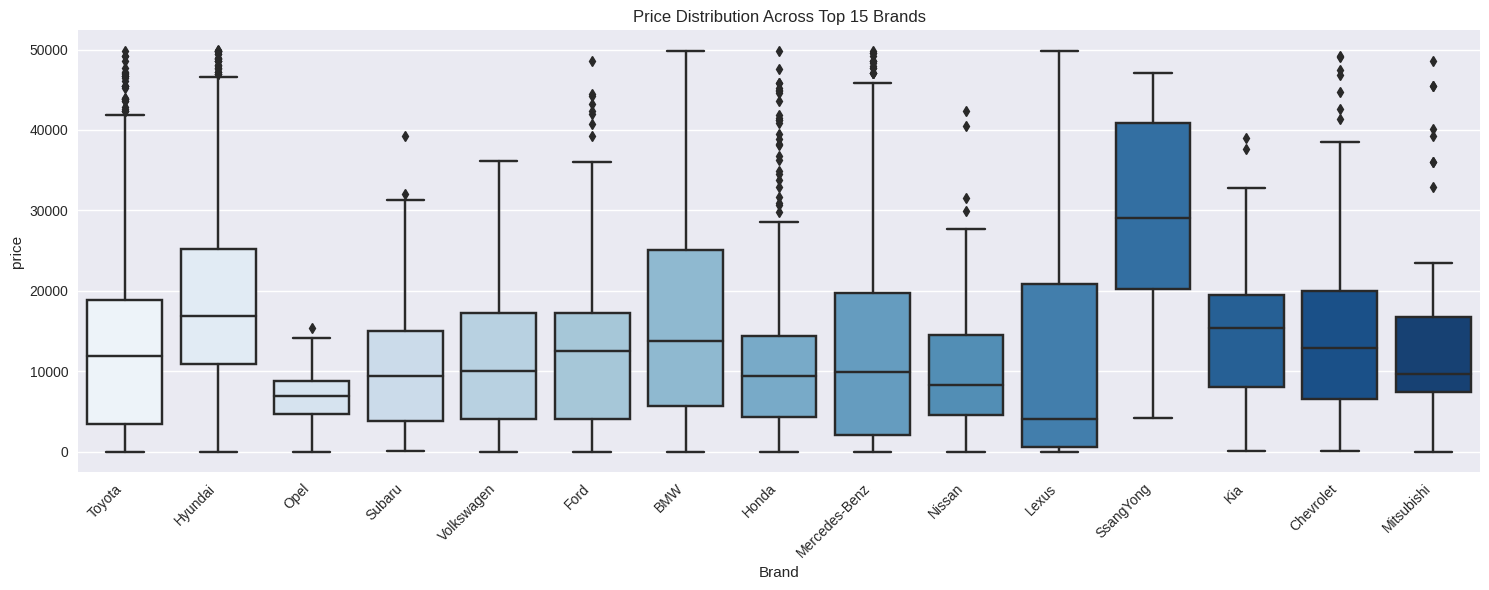

In [264]:
# 1. Price Distribution
plt.figure(figsize=(15, 6))
sns.boxplot(x='Brand', y='price', data=df_top15, palette=blues_palette)
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution Across Top 15 Brands')
plt.tight_layout()
plt.show()

#BMW, Mercedes-Benz, and SsangYong show the highest median prices
#Almost all brands have outliers above their typical price range
#Some brands like Mercedes-Benz maintain a consistently high price point (higher bottom whisker)

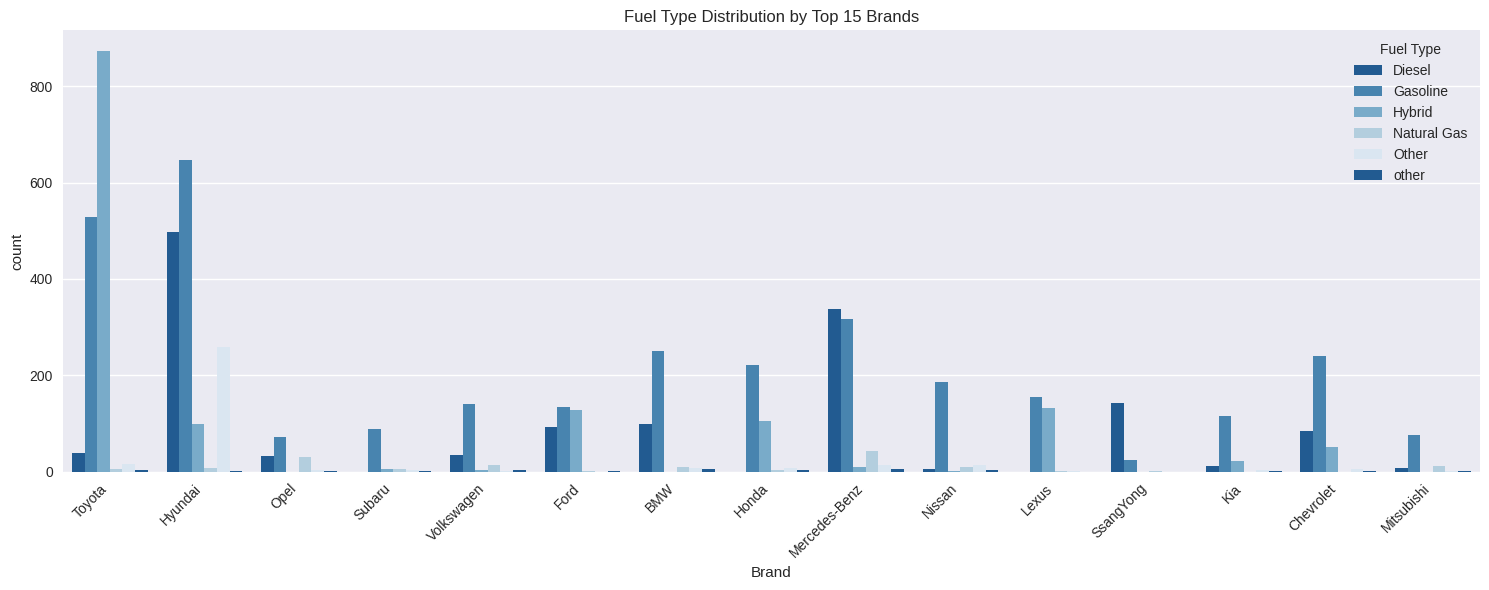

In [265]:
# 2. Fuel Type Distribution
plt.figure(figsize=(15, 6))
sns.countplot(data=df_top15, x='Brand', hue='fuel', palette=blues_palette_dark)
plt.xticks(rotation=45, ha='right')
plt.title('Fuel Type Distribution by Top 15 Brands')
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

#Most brand has hybrid fuel type
#Toyota is the most frequent Brand

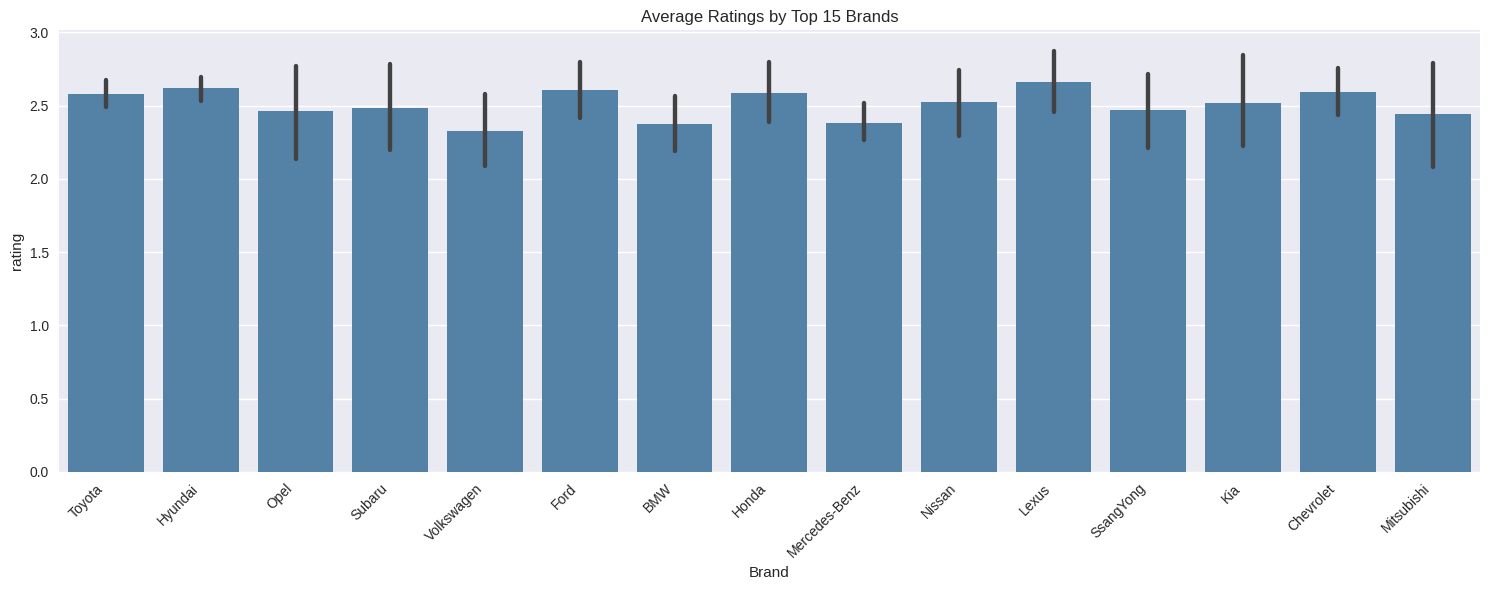

In [266]:
# 3. Average Ratings
plt.figure(figsize=(15, 6))
sns.barplot(x='Brand', y='rating', data=df_top15, color='steelblue')
plt.xticks(rotation=45, ha='right')
plt.title('Average Ratings by Top 15 Brands')
plt.tight_layout()
plt.show()
#Toyota and Hyundai lead the pack with the highest average ratings of approximately 2.5
#The rating scale appears to go from 0 to 3.0, with most brands scoring above 2.0
#The differences between brands are relatively small, suggesting consistent quality across major manufacturers

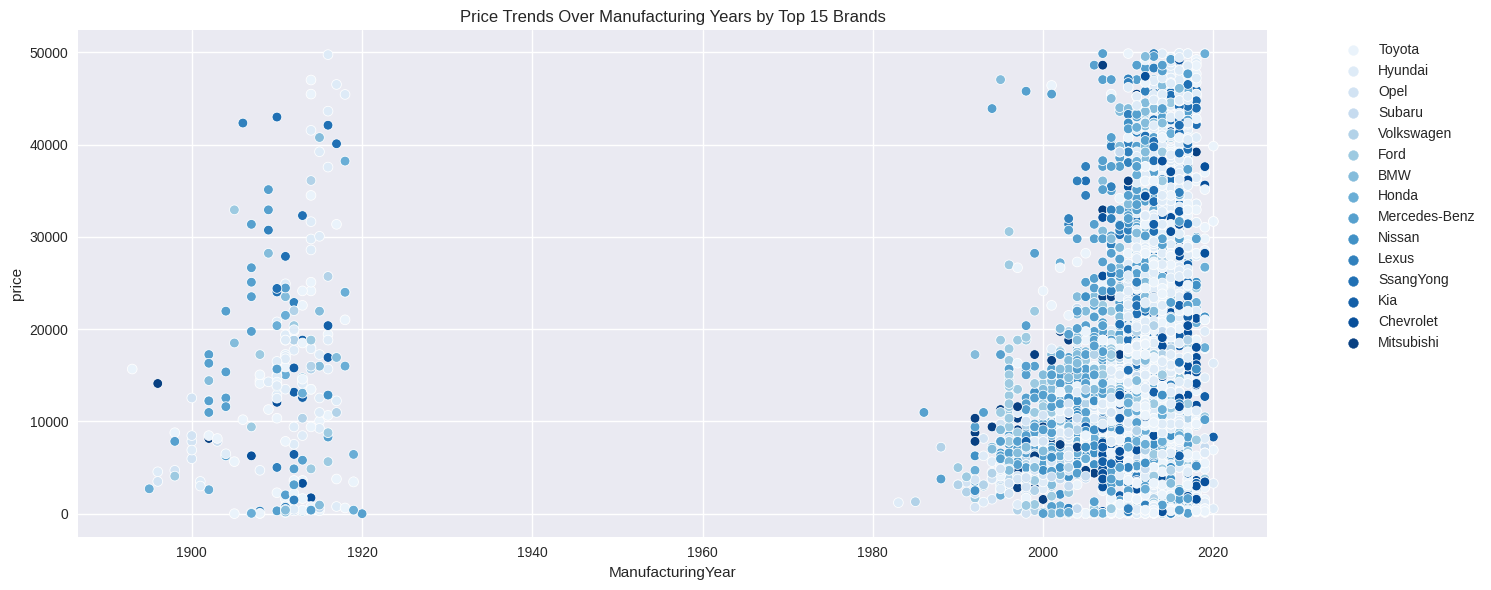

In [267]:
# 4. Price Trends Over Years
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df_top15, x='ManufacturingYear', y='price', hue='Brand', palette=blues_palette)
plt.title('Price Trends Over Manufacturing Years by Top 15 Brands')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
#There's a significant gap in data between approximately 1920 and 1980
#The price spread has become much wider in recent years, indicating greater market segmentation
#

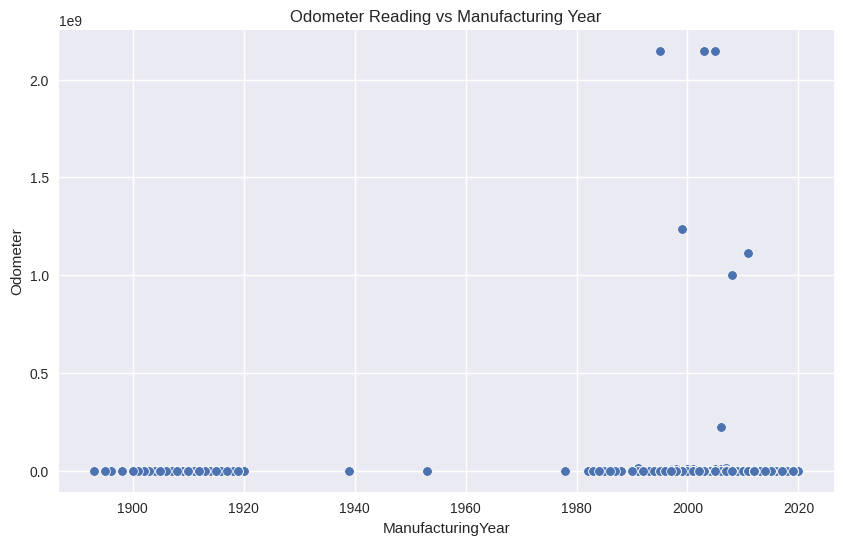

In [268]:
# Odometer reading by manufacturing year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='ManufacturingYear', y='Odometer')
plt.title('Odometer Reading vs Manufacturing Year')
plt.show()
#The highest odometer readings appear in vehicles from around 1980-2000
#The extremely high readings (2 billion) might indicate potential data recording errors or odometer rollovers


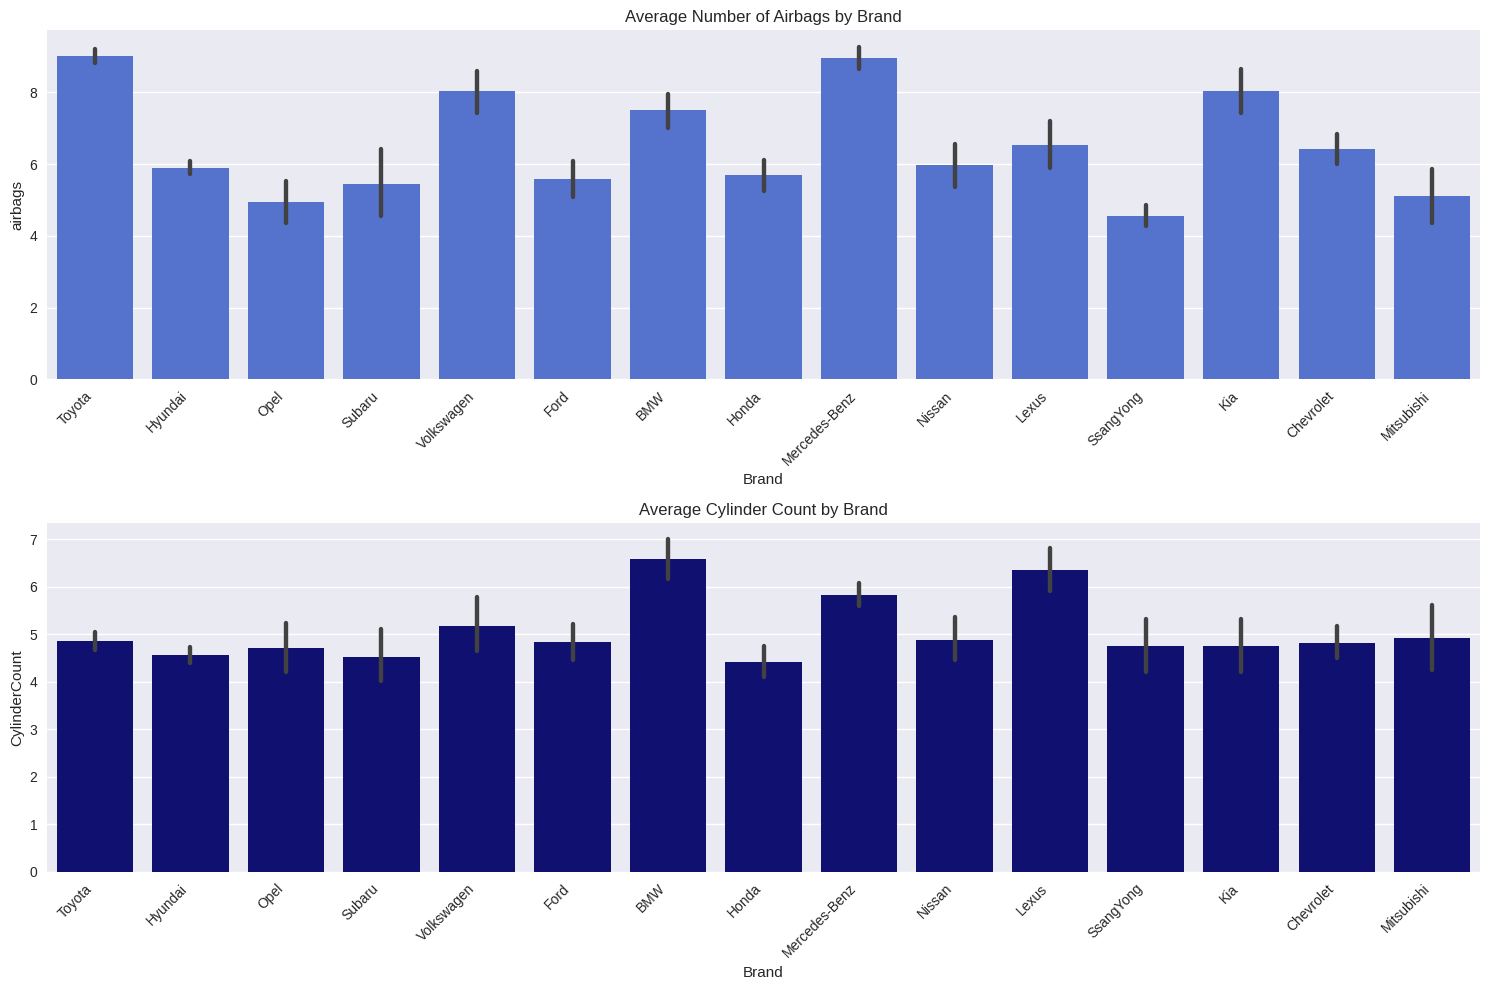

In [269]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Average airbags by brand
sns.barplot(data=df_top15, x='Brand', y='airbags', ax=ax1, color='royalblue')
ax1.set_title('Average Number of Airbags by Brand')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Corrected rotation
plt.setp(ax1.get_xticklabels(), ha='right')  

# Average cylinder count by brand
sns.barplot(data=df_top15, x='Brand', y='CylinderCount', ax=ax2, color='navy')
ax2.set_title('Average Cylinder Count by Brand')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)  # Corrected rotation
plt.setp(ax2.get_xticklabels(), ha='right')  # Horizontal alignment in separate step

plt.tight_layout()
plt.show()
#Lyxus and BMW have the highest number of cylinders
#Tyota and Mecedes-Benz have the highest number of airbags

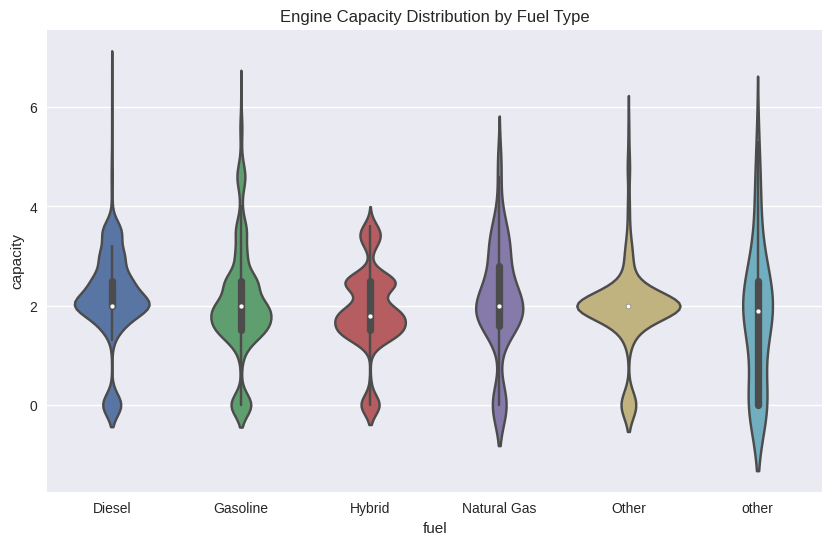

In [270]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='fuel', y='capacity', data=df_copy)
plt.title('Engine Capacity Distribution by Fuel Type')
plt.show()


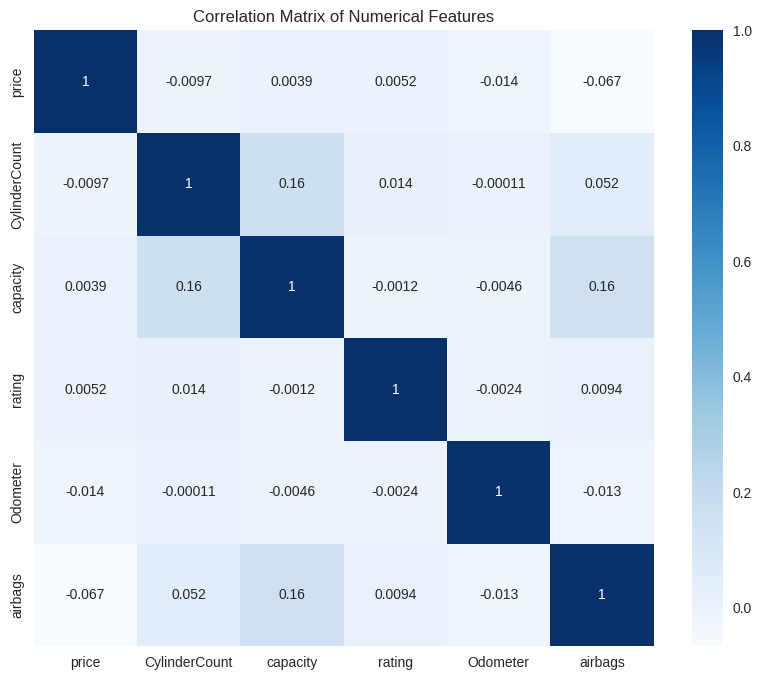

In [271]:
# 6. Correlation Heatmap
plt.figure(figsize=(10, 8))
features = ['price', 'CylinderCount', 'capacity', 'rating', 'Odometer', 'airbags']
correlation_matrix = df_copy[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [272]:
print(df_copy.groupby('Brand')['price'].mean().sort_values(ascending=False))
#SsangYong looks like the luxriest car

Brand
SsangYong        29852.754491
GMC              25010.500000
Jeep             22893.822222
Land Rover       22634.555556
Jaguar           20578.083333
Mini             19508.000000
Hyundai          18793.696689
Porsche          18488.500000
Maserati         17562.000000
Citroën          17143.666667
BMW              16488.213904
Infiniti         15837.285714
Kia              14386.500000
Chevrolet        14114.832021
Lincoln          13641.400000
Mercedes-Benz    13391.983562
Renault          13328.714286
Toyota           12824.042234
Peugeot          12769.000000
Mitsubishi       12690.980000
Ford             12496.011173
Scion            12335.333333
Skoda            12092.428571
Honda            11622.390671
Lexus            11571.239726
Audi             11538.240506
Volkswagen       10846.121212
Suzuki           10805.916667
Fiat             10526.000000
Subaru           10357.752381
Nissan           10197.018100
Great Wall       10036.000000
სხვა              9408.000000
Isuz


Correlations with price:
price                1.000000
ManufacturingYear    0.071674
rating               0.005160
capacity             0.003913
ID                  -0.004050
Duty                -0.009177
CylinderCount       -0.009726
Odometer            -0.013848
airbags             -0.067235
Name: price, dtype: float64


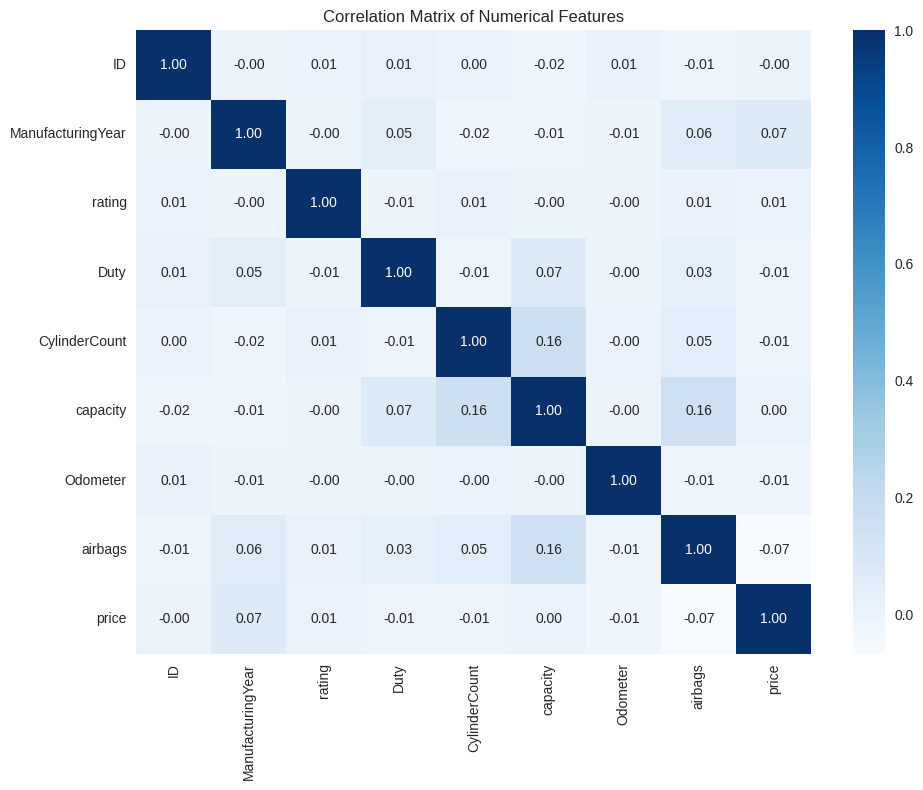

In [273]:
# Get numerical columns only
numerical_columns = df_copy.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlations with price (numerical columns only)
price_correlations = df_copy[numerical_columns].corr()['price'].sort_values(ascending=False)
print("\nCorrelations with price:")
print(price_correlations)

# For visualization
plt.figure(figsize=(10, 8))
sns.heatmap(df_copy[numerical_columns].corr(), 
            annot=True, 
            cmap='Blues', 
            fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()
#ManufacturingYear is the most correlated with the price

In [274]:
# Average specifications by brand
brand_stats = df_copy.groupby('Brand').agg({
    'price': 'mean',
    'rating': 'mean',
    'airbags': 'mean',
    'CylinderCount': 'mean'
}).round(2)
print("\nBrand Statistics:")
print(brand_stats)


Brand Statistics:
                  price  rating  airbags  CylinderCount
Brand                                                  
Acura           5209.00    2.00     8.00           6.00
Alfa Romeo      8122.00    3.50     7.00           4.00
Audi           11538.24    2.63     6.00           5.06
BMW            16488.21    2.38     7.49           6.58
Buick           5587.50    3.67    11.33           4.00
Cadillac        7317.67    3.33    11.33           4.00
Chevrolet      14114.83    2.59     6.43           4.82
Chrysler        9173.33    4.00    12.00           4.00
Citroën        17143.67    1.00     7.33           4.00
Daewoo          6736.47    2.67     4.53           5.40
Daihatsu        5514.20    2.20     6.40           3.80
Dodge           8357.70    2.00     9.03           4.67
Fiat           10526.00    2.13     8.83           4.00
Ford           12496.01    2.60     5.59           4.83
GAZ             6340.25    4.00     1.75           3.00
GMC            25010.50    1.

## Insights:
- BMW, Mercedes-Benz, and SsangYong show the highest median prices
- Almost all brands have outliers above their typical price range
- Some brands like Mercedes-Benz maintain a consistently high price point (higher bottom whisker)
- Most brand has hybrid fuel type
- Toyota is the most frequent Brand
- Toyota and Hyundai lead the pack with the highest average ratings of approximately 2.5
- The rating scale appears to go from 0 to 3.0, with most brands scoring above 2.0
- The differences between brands are relatively small, suggesting consistent quality across major manufacturers
- There's a significant gap in data between approximately 1920 and 1980
- The price spread has become much wider in recent years, indicating greater market segmentation
- The highest odometer readings appear in vehicles from around 1980-2000
- The extremely high readings (2 billion) might indicate potential data recording errors or odometer rollovers
- Lyxus and BMW have the highest number of cylinders
- Tyota and Mecedes-Benz have the highest number of airbags
- SsangYong looks like the luxriest car
- ManufacturingYear is the most correlated with the price

# Preprocessing and modeling

## Feature engineering

In [275]:
def categorize_engine_size(capacity):
    if capacity < 1.5:
        return 'Small'
    elif 1.5 <= capacity <= 3.0:
        return 'Medium'
    else:
        return 'Large'

df['EngineSize'] = df['capacity'].apply(categorize_engine_size)


In [276]:
def categorize_safety(airbags):
    if airbags <= 2:
        return 'Low'
    elif 3 <= airbags <= 6:
        return 'Medium'
    else:
        return 'High'

df['SafetyScore'] = df['airbags'].apply(categorize_safety)


## split the data

In [277]:
from sklearn.model_selection import train_test_split

X = df.drop(['price','ID'], axis=1)
y = df['price']

cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [278]:
cat_cols,num_cols

(Index(['Brand', 'VehicleModel', 'Type', 'color', 'fuel', 'type of gear',
        'EngineSize', 'SafetyScore'],
       dtype='object'),
 Index(['ManufacturingYear', 'rating', 'Duty', 'CylinderCount', 'capacity',
        'Odometer', 'airbags'],
       dtype='object'))

In [279]:
# handle the outliers
y_train = pd.DataFrame(y_train, columns=['price'])

# Concatenate X_train and y_train
combined_data = pd.concat([X_train, y_train], axis=1)
# Calculate skewness for specific columns
old_skew = combined_data[['ManufacturingYear', 'rating', 'Duty', 'CylinderCount', 'capacity', 'Odometer', 'airbags', 'price']].skew()
print(old_skew)
# the odometer should be dealt with

ManufacturingYear    -4.400433
rating                0.435384
Duty                  2.565774
CylinderCount         1.600027
capacity              0.333163
Odometer             41.897647
airbags              -0.143429
price                 0.904300
dtype: float64


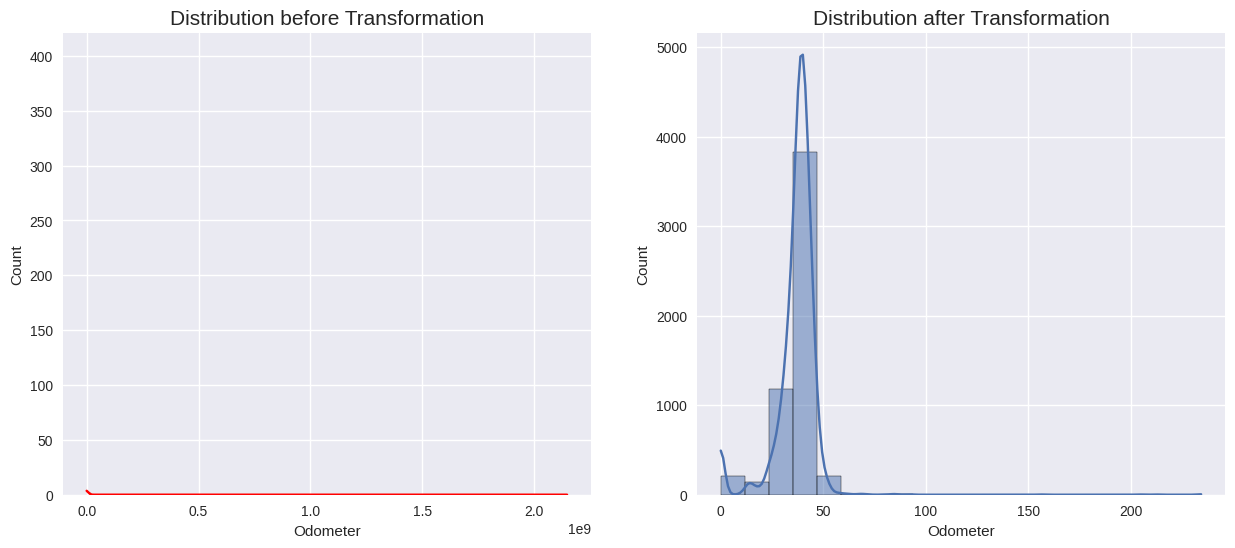

Skewness was 41.9 before & is 2.4 after Yeo-johnson transformation.


In [280]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer

def yeojohntrans(data,feature):
    '''
    Apply Yeo-Johnson transformation and check the distribution with histogram and kdeplot.
    parameters:
        feature: target feature to be transformed.
    '''

    yeojohnTr = PowerTransformer(standardize=False) # Notice: yeo-johnson is the default

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(data[feature], kde=True, color="red")
    plt.subplot(1,2,2)

    df_yeojohn = pd.DataFrame(yeojohnTr.fit_transform(data[feature].values.reshape(-1,1)))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_yeojohn,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    print(f'''Skewness was {round(old_skew[feature],2)} before & is {round(df_yeojohn.skew()[0],2)} after Yeo-johnson transformation.''')

yeojohntrans(X_train,feature="Odometer")


## Preprocessing phase

* i can't use the functions of fill the missing directly on the test data because i don't know the values of the test data or i can't use the mode of it
* i'll impute the missing values of the train and test scale the numeric data and label the categories ones

In [281]:
import pandas as pd

def compute_fill_values(train_df):
    fill_values = {}

    # VehicleModel
    fill_values['VehicleModel'] = train_df.groupby(['CylinderCount', 'capacity'])['VehicleModel'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'unknown').to_dict()

    # Brand
    fill_values['Brand'] = train_df.groupby('VehicleModel')['Brand'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'unknown').to_dict()

    # ManufacturingYear
    fill_values['ManufacturingYear'] = train_df.groupby(['Brand', 'VehicleModel', 'CylinderCount'])['ManufacturingYear'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else train_df['ManufacturingYear'].mode().iloc[0]).to_dict()

    # Type of Gear
    fill_values['type of gear'] = train_df.groupby(['Brand', 'VehicleModel', 'Type'])['type of gear'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'others').to_dict()

    # Fuel
    fill_values['fuel'] = train_df.groupby(['Brand', 'VehicleModel', 'Type'])['fuel'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'other').to_dict()

    # Duty
    fill_values['Duty'] = train_df.groupby('Brand')['Duty'].median().fillna(0).to_dict()

    # Color
    fill_values['color'] = train_df.groupby(['Brand', 'VehicleModel', 'Type'])['color'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'unknown').to_dict()

    # Rating
    fill_values['rating'] = train_df.groupby(['Brand', 'VehicleModel', 'Type', 'CylinderCount'])['rating'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 0).to_dict()

    # Type
    fill_values['Type'] = train_df.groupby(['Brand', 'VehicleModel'])['Type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'unknown').to_dict()

    return fill_values

def transform_test_data(test_df, fill_values):
    # VehicleModel
    test_df['VehicleModel'] = test_df.apply(lambda row: fill_values['VehicleModel'].get((row['CylinderCount'], row['capacity']), 'unknown') if pd.isna(row['VehicleModel']) else row['VehicleModel'], axis=1)

    # Brand
    test_df['Brand'] = test_df.apply(lambda row: fill_values['Brand'].get(row['VehicleModel'], 'unknown') if pd.isna(row['Brand']) else row['Brand'], axis=1)

    # ManufacturingYear
    test_df['ManufacturingYear'] = test_df.apply(lambda row: fill_values['ManufacturingYear'].get((row['Brand'], row['VehicleModel'], row['CylinderCount']), test_df['ManufacturingYear'].mode().iloc[0]) if pd.isna(row['ManufacturingYear']) else row['ManufacturingYear'], axis=1)

    # Type of Gear
    test_df['type of gear'] = test_df.apply(lambda row: fill_values['type of gear'].get((row['Brand'], row['VehicleModel'], row['Type']), 'others') if pd.isna(row['type of gear']) else row['type of gear'], axis=1)

    # Fuel
    test_df['fuel'] = test_df.apply(lambda row: fill_values['fuel'].get((row['Brand'], row['VehicleModel'], row['Type']), 'other') if pd.isna(row['fuel']) else row['fuel'], axis=1)

    # Duty
    test_df['Duty'] = test_df['Brand'].map(fill_values['Duty']).fillna(0)

    # Color
    test_df['color'] = test_df.apply(lambda row: fill_values['color'].get((row['Brand'], row['VehicleModel'], row['Type']), 'unknown') if pd.isna(row['color']) else row['color'], axis=1)

    # Rating
    test_df['rating'] = test_df.apply(lambda row: fill_values['rating'].get((row['Brand'], row['VehicleModel'], row['Type'], row['CylinderCount']), 0) if pd.isna(row['rating']) else row['rating'], axis=1)

    # Type
    test_df['Type'] = test_df.apply(lambda row: fill_values['Type'].get((row['Brand'], row['VehicleModel']), 'unknown') if pd.isna(row['Type']) else row['Type'], axis=1)

    return test_df

In [282]:
def transform_test_data(test_df, fill_values):
    # VehicleModel
    test_df['VehicleModel'] = test_df.apply(lambda row: fill_values['VehicleModel'].get((row['CylinderCount'], row['capacity']), 'unknown') if pd.isna(row['VehicleModel']) else row['VehicleModel'], axis=1)

    # Brand
    test_df['Brand'] = test_df.apply(lambda row: fill_values['Brand'].get(row['VehicleModel'], 'unknown') if pd.isna(row['Brand']) else row['Brand'], axis=1)

    # ManufacturingYear
    test_df['ManufacturingYear'] = test_df.apply(lambda row: fill_values['ManufacturingYear'].get((row['Brand'], row['VehicleModel'], row['CylinderCount']), test_df['ManufacturingYear'].mode().iloc[0]) if pd.isna(row['ManufacturingYear']) else row['ManufacturingYear'], axis=1)

    # Type of Gear
    test_df['type of gear'] = test_df.apply(lambda row: fill_values['type of gear'].get((row['Brand'], row['VehicleModel'], row['Type']), 'others') if pd.isna(row['type of gear']) else row['type of gear'], axis=1)

    # Fuel
    test_df['fuel'] = test_df.apply(lambda row: fill_values['fuel'].get((row['Brand'], row['VehicleModel'], row['Type']), 'other') if pd.isna(row['fuel']) else row['fuel'], axis=1)

    # Duty
    test_df['Duty'] = test_df['Brand'].map(fill_values['Duty']).fillna(0)

    # Color
    test_df['color'] = test_df.apply(lambda row: fill_values['color'].get((row['Brand'], row['VehicleModel'], row['Type']), 'unknown') if pd.isna(row['color']) else row['color'], axis=1)

    # Rating
    test_df['rating'] = test_df.apply(lambda row: fill_values['rating'].get((row['Brand'], row['VehicleModel'], row['Type'], row['CylinderCount']), 0) if pd.isna(row['rating']) else row['rating'], axis=1)

    # Type
    test_df['Type'] = test_df.apply(lambda row: fill_values['Type'].get((row['Brand'], row['VehicleModel']), 'unknown') if pd.isna(row['Type']) else row['Type'], axis=1)

    return test_df

In [283]:
fill_values = compute_fill_values(X_train)

X_train = transform_test_data(X_train, fill_values)
X_test = transform_test_data(X_test, fill_values)

In [284]:
yeo_johnson_attributes_x=['Odometer']

In [285]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split ,GridSearchCV

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import FunctionTransformer

Hot_encoder = OneHotEncoder()

cat_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore')
)

yoeJohnson_pipeline = make_pipeline(
    (SimpleImputer(strategy='median')),
    (PowerTransformer(standardize=False)),
    (StandardScaler())
)

num_pipeline = make_pipeline(
    StandardScaler()
)

full_pipeline_Preprocessing = ColumnTransformer(
    transformers=[
        ('cat', cat_pipeline, cat_cols.tolist()),
        ('num', num_pipeline, num_cols),
        ('yeo_johnson',yoeJohnson_pipeline,yeo_johnson_attributes_x)
    ],
    remainder='passthrough'
)


In [286]:
X_train.isna().sum()

Brand                0
VehicleModel         0
ManufacturingYear    0
Type                 0
rating               0
color                0
Duty                 0
fuel                 0
CylinderCount        0
type of gear         0
capacity             0
Odometer             0
airbags              0
EngineSize           0
SafetyScore          0
dtype: int64

In [287]:
X_train_ready = full_pipeline_Preprocessing.fit_transform(X_train)
X_test_ready  = full_pipeline_Preprocessing.transform(X_test)

## Modeling

In [288]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

In [289]:
model_name= []
mae = []
R2 = []

models = [
    LinearRegression(),
    SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    SVR(),
    Ridge(alpha=0.1, solver="cholesky",fit_intercept=False),
    Lasso(alpha=0.1)
]

for model in models :
    
    predictions=cross_val_predict(model,X_train_ready,y_train,cv=3)    
    
    model_name.append(model.__class__.__name__)
    mae.append(str((mean_absolute_error(y_train, predictions))))
    R2.append(str(r2_score(y_train, predictions)))

In [290]:
models_df = pd.DataFrame({"model-name":model_name, "mae": mae,"R2":R2})
models_df = models_df.set_index('model-name')
models_df.sort_values("mae")

,mae,R2
model-name,,
RandomForestRegressor,6011.756669230443,0.4701842142980994
DecisionTreeRegressor,7680.714464285715,0.005345948489191121
SGDRegressor,7780.370494874295,0.2658257758491115
Ridge,7841.483211787615,0.24799388150896173
Lasso,7850.0791552141545,0.2442941739812413
LinearRegression,7879.285897157389,0.23927415284399278
SVR,9118.319824744229,-0.021747723872387104


In [291]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(estimator= random_forest_reg , param_grid=param_grid, cv = 3 , n_jobs=-1 , scoring='neg_mean_squared_error')

grid_search.fit(X_train_ready,y_train)

best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

predictions = cross_val_predict(best_estimator,X_train_ready,y_train,cv = 3)

best_mae = mean_absolute_error(y_train, predictions)
best_r2 = r2_score(y_train, predictions)

best_mae , best_r2

(6495.2330539859695, 0.43036253941479197)

In [292]:
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Define the models
gb = LGBMRegressor(n_estimators=1500, verbosity=0)
cb = CatBoostRegressor(iterations=1500, verbose=0)
xgb = XGBRegressor(n_estimators=1500, verbosity=0)
gbr = GradientBoostingRegressor()

# Voting Regressor
voting_reg = VotingRegressor(estimators=[
    ('lgbm', gb),
    ('catboost', cb),
    ('xgb', xgb),
    ('gbr', gbr)
])

# Cross-validation for Voting Regressor
voting_scores = cross_val_score(voting_reg, X_train_ready, y_train, cv=3, scoring='neg_mean_absolute_error')
voting_scores = -voting_scores  # Convert to positive MAE
print(f"Voting Regressor MAE: {voting_scores.mean()}")

# Stacking Regressor
stacking_reg = StackingRegressor(estimators=[
    ('lgbm', gb),
    ('catboost', cb),
    ('xgb', xgb),
    ('gbr', gbr)
], final_estimator=LinearRegression())  # Add a final estimator

# Cross-validation for Stacking Regressor
stacking_reg_scores = cross_val_score(stacking_reg, X_train_ready, y_train, cv=3, scoring='neg_mean_absolute_error')
stacking_reg_scores = -stacking_reg_scores  # Convert to positive MAE
print(f"Stacking Regressor MAE: {stacking_reg_scores.mean()}")

Voting Regressor MAE: 6175.595643774108
Stacking Regressor MAE: 6179.0057872184925


In [293]:
from sklearn.ensemble import StackingRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Define the base models
gb = LGBMRegressor(n_estimators=1500, verbosity=0)
cb = CatBoostRegressor(iterations=1500, verbose=0)
xgb = XGBRegressor(n_estimators=1500, verbosity=0)
gbr = GradientBoostingRegressor()
et = ExtraTreesRegressor(n_estimators=500, random_state=42)  # Extra Trees model

# Bagging model (using DecisionTreeRegressor as the base estimator)
bagging = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=100,
    random_state=42
)

# Stacking Regressor with all models
stacking_reg = StackingRegressor(estimators=[
    ('lgbm', gb),
    ('catboost', cb),
    ('xgb', xgb),
    ('gbr', gbr),
    ('extra_trees', et),  # Add Extra Trees
    ('bagging', bagging)  # Add Bagging
], final_estimator=LinearRegression())  # Final estimator

# Example usage with cross-validation
from sklearn.model_selection import cross_val_score

# Assuming X_train_ready and y_train are your preprocessed data
stacking_scores = cross_val_score(stacking_reg, X_train_ready, y_train, cv=3, scoring='neg_mean_absolute_error')
stacking_scores = -stacking_scores  # Convert to positive MAE
print(f"Stacking Regressor MAE: {stacking_scores.mean()}")

Stacking Regressor MAE: 5972.023725699815


In [294]:
from sklearn.ensemble import (
    StackingRegressor, ExtraTreesRegressor, BaggingRegressor,
    RandomForestRegressor, VotingRegressor
)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Define the base models
gb = LGBMRegressor(n_estimators=1500, verbosity=0)
cb = CatBoostRegressor(iterations=1500, verbose=0)
xgb = XGBRegressor(n_estimators=1500, verbosity=0)
gbr = GradientBoostingRegressor()
et = ExtraTreesRegressor(n_estimators=500, random_state=42)
rf = RandomForestRegressor(n_estimators=500, random_state=42)  # Added Random Forest
bagging = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=100,
    random_state=42
)

# Stacking Regressor with all models including Random Forest
stacking_reg_2 = StackingRegressor(
    estimators=[
        ('lgbm', gb),
        ('catboost', cb),
        ('xgb', xgb),
        ('gbr', gbr),
        ('extra_trees', et),
        ('random_forest', rf),  # Added Random Forest
        ('bagging', bagging)
    ],
    final_estimator=LinearRegression()
)

# Create Voting Regressor
voting_reg_2 = VotingRegressor([
    ('lgbm', gb),
    ('catboost', cb),
    ('xgb', xgb),
    ('gbr', gbr),
    ('extra_trees', et),
    ('random_forest', rf),
    ('bagging', bagging)
])

# Evaluate both models using cross-validation
from sklearn.model_selection import cross_val_score

# Evaluate Stacking Regressor
stacking_scores = cross_val_score(stacking_reg, X_train_ready, y_train, 
                                cv=3, scoring='neg_mean_absolute_error')
stacking_scores = -stacking_scores  # Convert to positive MAE
print(f"Stacking Regressor MAE: {stacking_scores.mean():.4f} (+/- {stacking_scores.std() * 2:.4f})")

# Evaluate Voting Regressor
voting_scores = cross_val_score(voting_reg, X_train_ready, y_train, 
                              cv=3, scoring='neg_mean_absolute_error')
voting_scores = -voting_scores  # Convert to positive MAE
print(f"Voting Regressor MAE: {voting_scores.mean():.4f} (+/- {voting_scores.std() * 2:.4f})")


Stacking Regressor MAE: 5970.7490 (+/- 80.4498)
Voting Regressor MAE: 6177.1758 (+/- 100.1558)


In [299]:
stacking_reg_2 = StackingRegressor(
    estimators=[
        ('lgbm', gb),
        ('catboost', cb),
        ('xgb', xgb),
        ('gbr', gbr),
        ('extra_trees', et),
        ('random_forest', rf),  # Added Random Forest
        ('bagging', bagging)
    ],
    final_estimator=LinearRegression()
)

# Model evaluation
stack regressor give the minimum MAE so we'll go with this model for evaluation

In [300]:
# First fit the models
stacking_reg_2.fit(X_train_ready, y_train)

# Now you can make predictions
stacking_predictions = stacking_reg_2.predict(X_test_ready)

# Calculate MAE
from sklearn.metrics import mean_absolute_error

stacking_mae = mean_absolute_error(y_test, stacking_predictions)

print(f"Stacking Regressor MAE on test set: {stacking_mae:.4f}")

Stacking Regressor MAE on test set: 5477.6314


# Test submission

In [315]:
test_data=pd.read_csv("/kaggle/input/recruitment-task/test.csv")

In [316]:
submission=test_data[['ID']]

submission

,ID
0,5634
1,16689
2,13457
3,4555
4,9726
...,...
2995,14959
2996,10125
2997,9275
2998,1812


In [317]:
test_data.drop(['ID'],inplace=True,axis=1)

In [318]:
test_data.rename(columns={'#airbags': 'airbags'}, inplace=True)

In [319]:
test_data

,Brand,VehicleModel,ManufacturingYear,Type,rating,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,airbags
0,NaN,I have the fastest model ever.. yes you got it...,NaN,SEDAN,4.0,Jet Black,I had to pay a substantial $1017 levy on my ne...,NaN,4.0,auto,2,1600,12 bags
1,HONDA,I own Civic Hybrid.,2012;,sedan,1.0,Sky Blue,=,Electric Hybrid,4.0,auto,1.5,TOTAL 141302 km,12
2,I love BMW,I own M3.,2006,hatchback,1.0,NaN,-,Dies,4.0,manual,1.9 Turbo,136000 kilo,6
3,hyundai,ELANTRA,3016,sedan,3.0,NaN,2188 pound,Gas,4.0,gear,1.8,78000,10
4,mercedes-benz,my model which is E 300 is the best,NaN,Sedan,8.0,NaN,1017,NaN,4.0,R,2,1600 kilometer,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,NaN,E 320,2001,SEDAN,1.0,Jet Black,-,Gas,6.0,auto,3.2,2000 kilometer,ONLY 8 AIRBAG
2996,nissan,X-TRAIL,2005,jeep,2.0,Gold,-,Gas,4.0,NaN,0,180000 kilometer,8 bags
2997,ford,I have the fastest model ever.. yes you got it...,2011,Microbus1,4.0,NaN,-,Gas,4.0,R,1.3,148000 kilo,8 bags
2998,volkswagen,Jetta,2017,SEDAN,NaN,Pearl White,-,Gas,14.0,auto,1.4 Turbo,50000 km,4 bags


In [320]:
test_data['Brand'] = test_data['Brand'].apply(clean_brand)
test_data = clean_vehicle_model(test_data)
test_data['ManufacturingYear'] = test_data['ManufacturingYear'].apply(clean_year)
test_data['Type'] = test_data['Type'].apply(clean_type)
test_data['rating'] = test_data['rating'].apply(clean_rating)
test_data['Duty'] = test_data['Duty'].apply(extractNumbers)
test_data['fuel'] = test_data['fuel'].replace(fuel_replace)
test_data['CylinderCount'] = test_data['CylinderCount'].apply(extractNumbers)
test_data['type of gear'] = test_data['type of gear'].replace(transmission_replace)
test_data['capacity'] = test_data['capacity'].apply(clean_capacity)
test_data['Odometer'] = test_data['Odometer'].apply(extractNumbers)
test_data = clean_column(test_data, 'airbags')

In [322]:
test_data['EngineSize'] = test_data['capacity'].apply(categorize_engine_size)
test_data['SafetyScore'] = test_data['airbags'].apply(categorize_safety)

In [323]:
test_data = transform_test_data(test_data, fill_values)
X_test_ready  = full_pipeline_Preprocessing.transform(test_data)

In [325]:
pred = stacking_reg_2.predict(X_test_ready)

In [326]:
submission['price']=pred

In [327]:
submission.to_csv("submission.csv")

In [328]:
submission

,ID,price
0,5634,9043.123255
1,16689,12963.422745
2,13457,11081.627918
3,4555,15573.444118
4,9726,9771.734479
...,...,...
2995,14959,10333.156455
2996,10125,11794.263930
2997,9275,15651.239201
2998,1812,20568.974619
